<a href="https://colab.research.google.com/github/ShikhaChhabra/credit-card-fraud-detection/blob/main/Credit_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [ ]:
# Install Kaggle API if not already installed
!pip install -q kaggle

# Move kaggle.json to the correct location and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset directly from Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Unzip the downloaded file
!unzip creditcardfraud.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 92% 61.0M/66.0M [00:00<00:00, 83.5MB/s]
100% 66.0M/66.0M [00:00<00:00, 72.5MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
data = pd.read_csv('/content/creditcard.csv')
print(f"Dataset Shape: {data.shape}")


Dataset Shape: (284807, 31)


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
print(data.info())
print("\nMissing Values in Each Column:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#distribution of legit transactions and fraudulent transaction
print("\nTransaction Class Distribution:\n", data['Class'].value_counts())


Transaction Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


This dataset is highly imbalanced

0 --> Normal Transaction

1 --> Fraudulent Transaction

In [ ]:
#separating the data for analysis
legit=data[data.Class==0]
fraud=data[data.Class==1]

In [ ]:
print("\nLegitimate Transaction Amount Statistics:\n", legit.Amount.describe())
print("\nFraudulent Transaction Amount Statistics:\n", fraud.Amount.describe())


Legitimate Transaction Amount Statistics:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraudulent Transaction Amount Statistics:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
#compare values for both transaction
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under Sampling

Build a sample dataset containing similar distribution of normal and fraudulent transactions

No. of Fraudulent Transactions --> 492

In [ ]:
legit_sample=legit.sample(n=492)

Concatenating 2 dataframes

In [ ]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18722,29718.0,-0.350197,1.035328,1.272936,0.076964,-0.058640,-1.024159,0.617527,-0.005126,-0.216211,...,-0.276792,-0.785714,-0.001220,0.302345,-0.200198,0.075823,0.237960,0.095981,1.79,0
280070,169301.0,-0.483818,-0.732984,0.512948,-1.634409,0.181490,-1.494237,-0.397937,0.031051,-0.438438,...,0.330229,0.612974,-0.006112,-0.101124,0.146665,-0.175657,-0.048918,-0.001232,49.00,0
197505,132049.0,1.848564,-0.496278,-0.960238,0.467249,-0.265977,-0.443170,-0.125509,-0.078267,0.544806,...,0.043327,0.059705,0.100037,-0.315182,-0.224105,0.218461,-0.060095,-0.052706,87.80,0
282197,170724.0,-0.305903,-0.315298,-0.388108,-0.945070,2.973207,3.834021,-0.456365,0.509272,1.029133,...,0.330821,1.510257,-0.230787,0.775545,-1.413903,-0.253250,-0.241819,-0.167980,14.27,0
43107,41373.0,-0.596946,1.134506,0.727373,1.140355,0.416302,0.591669,0.227599,0.551416,-0.522524,...,-0.006035,0.094207,-0.230908,-0.905693,0.004807,-0.177166,0.061216,0.061793,10.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95409.036585,0.026219,0.080322,0.046174,-0.074771,0.062351,0.006898,0.009336,0.009798,-0.045549,...,0.018150,-0.009867,-0.024946,-0.018476,-0.02708,-0.035324,-0.012664,-0.000686,0.001779,77.446443
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


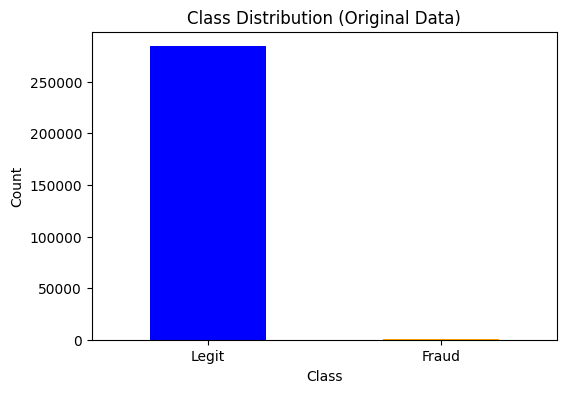

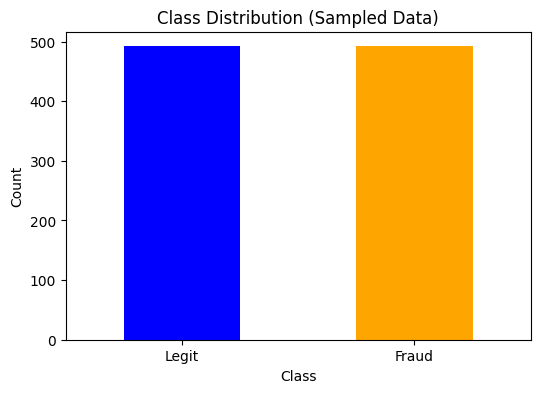

In [ ]:
plt.figure(figsize=(6, 4))
data['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution (Original Data)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Legit', 'Fraud'], rotation=0)
plt.show()

plt.figure(figsize=(6, 4))
new_dataset['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution (Sampled Data)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Legit', 'Fraud'], rotation=0)
plt.show()


Splitting the data into Features and Targets

In [ ]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [ ]:
print(f"\nFeatures Shape: {X.shape}")
print(X)


Features Shape: (984, 30)
            Time        V1        V2        V3        V4        V5        V6  \
18722    29718.0 -0.350197  1.035328  1.272936  0.076964 -0.058640 -1.024159   
280070  169301.0 -0.483818 -0.732984  0.512948 -1.634409  0.181490 -1.494237   
197505  132049.0  1.848564 -0.496278 -0.960238  0.467249 -0.265977 -0.443170   
282197  170724.0 -0.305903 -0.315298 -0.388108 -0.945070  2.973207  3.834021   
43107    41373.0 -0.596946  1.134506  0.727373  1.140355  0.416302  0.591669   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

            

In [ ]:
print(f"\nTarget Shape: {Y.shape}")
print(Y)


Target Shape: (984,)
18722     0
280070    0
197505    0
282197    0
43107     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Splitiing data into training and testing datasets

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(f"\nTrain-Test Shapes: {X_train.shape}, {X_test.shape}")


Train-Test Shapes: (787, 30), (197, 30)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [ ]:
model=LogisticRegression(max_iter=500,class_weight='balanced')

In [ ]:
model.fit(X_train_scaled,Y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

Model Evaluation

Accuracy Score

In [ ]:
X_train_pred = model.predict(X_train_scaled)
training_acc = accuracy_score(X_train_pred, Y_train)
print(f"\nTraining Accuracy: {training_acc * 100:.2f}%")


Training Accuracy: 95.43%


In [ ]:
X_test_pred = model.predict(X_test_scaled)
test_acc = accuracy_score(X_test_pred, Y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 92.89%


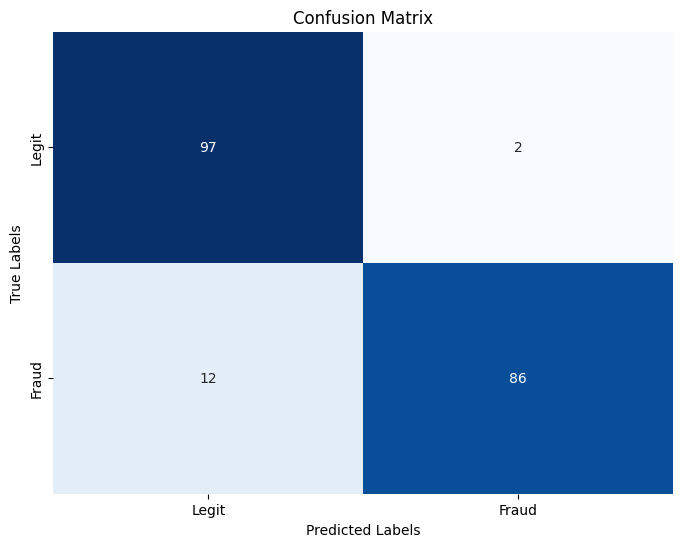


Classification Report:
              precision    recall  f1-score   support

       Legit       0.89      0.98      0.93        99
       Fraud       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [ ]:
cm = confusion_matrix(Y_test, X_test_pred)
classes = ['Legit', 'Fraud']

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report for additional metrics
print("\nClassification Report:")
print(classification_report(Y_test, X_test_pred, target_names=classes))

In [ ]:
joblib.dump(model, 'logistic_regression_model.joblib')
print("\nModel saved as 'logistic_regression_model.joblib'.")

# Step 15: Load and Predict with the Saved Model
loaded_model = joblib.load('logistic_regression_model.joblib')
test_predictions = loaded_model.predict(X_test_scaled)
print("\nPredictions on Test Data:", test_predictions)


Model saved as 'logistic_regression_model.joblib'.

Predictions on Test Data: [1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 1 1 1 0 1 1 1 0]
